In [29]:
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf

In [30]:
subjects = [1, 2]  # Using 2 subjects
runs = [6, 10, 14]  # Motor imagery: hands vs feet
data_path = "/home/student/Advance-Machine-Learning/Mini_Project/datasets"

# Load files
raw_fnames = eegbci.load_data(subjects, runs, path=data_path)

print(f"Loaded {len(raw_fnames)} files")
print(f"First file: {raw_fnames[0]}")

Loaded 6 files
First file: /home/student/Advance-Machine-Learning/Mini_Project/datasets/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R06.edf


In [31]:
# Read all EDF files and combine them
raw = concatenate_raws([read_raw_edf(f, preload=True) for f in raw_fnames])

raw.rename_channels(lambda x: x.strip('.')) # Clean up channel names (remove dots)

print(f"Data loaded!")
print(f"Duration: {raw.times[-1]:.1f} seconds")
print(f"Channels: {raw.n_times} samples, {len(raw.ch_names)} channels")
print(f"Sampling rate: {raw.info['sfreq']} Hz")

Data loaded!
Duration: 744.0 seconds
Channels: 119040 samples, 64 channels
Sampling rate: 160.0 Hz


In [32]:
# Set Electrode Positions
# This tells MNE where each electrode is on the scalp

eegbci.standardize(raw)  # Standardize channel names
montage = mne.channels.make_standard_montage('standard_1005')
raw.set_montage(montage)

print("Electrode positions set")
print(f"Channel names: {raw.ch_names[:10]}...")  # Show first 10

Electrode positions set
Channel names: ['FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1']...


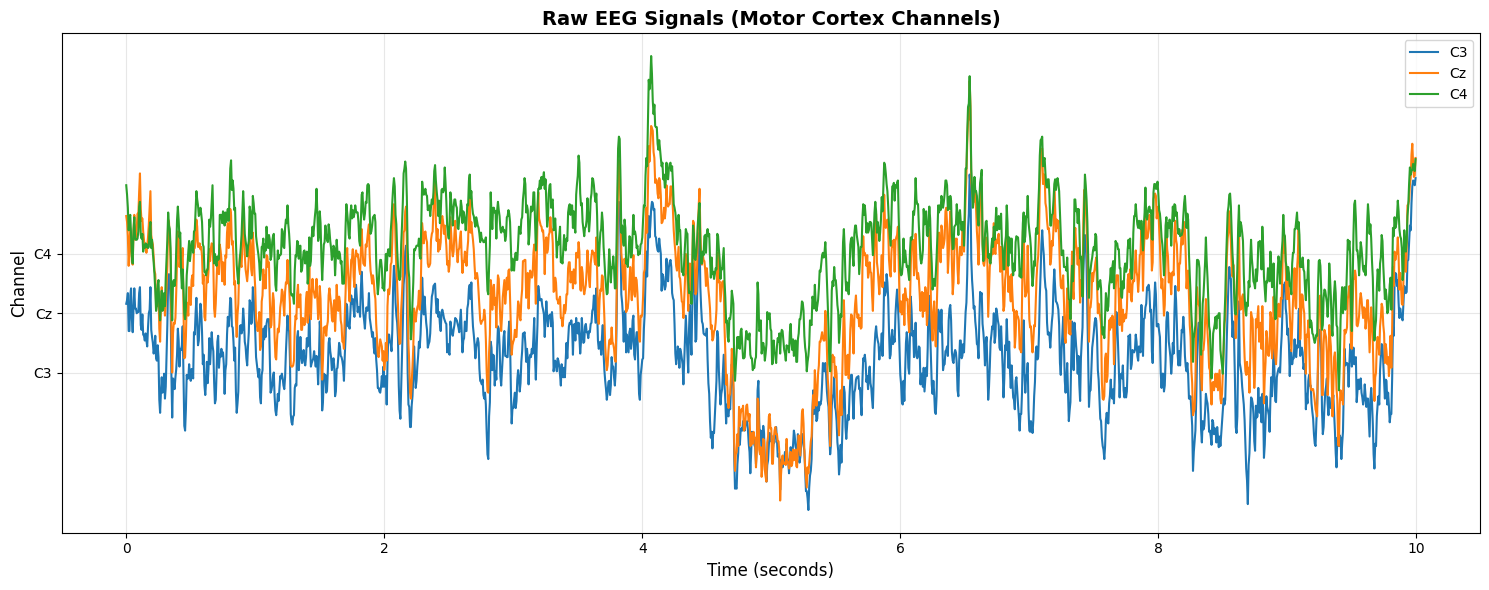

This shows the raw brain signals - notice they're quite noisy!


In [33]:
duration = 10  # seconds
channels_to_plot = ['C3', 'Cz', 'C4']  # Motor cortex channels

data, times = raw.copy().pick_channels(channels_to_plot).get_data(return_times=True)
data = data[:, :int(duration * raw.info['sfreq'])]
times = times[:int(duration * raw.info['sfreq'])]

# Plot
plt.figure(figsize=(15, 6))
for i, ch in enumerate(channels_to_plot):
    plt.plot(times, data[i] * 1e6 + i * 50, label=ch)  # Convert to µV

plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Channel', fontsize=12)
plt.title('Raw EEG Signals (Motor Cortex Channels)', fontsize=14, fontweight='bold')
plt.yticks([0, 50, 100], channels_to_plot)
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("This shows the raw brain signals - notice they're quite noisy!")

/home/student/Advance-Machine-Learning/.venv/lib/python3.13/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
/tmp/ipykernel_2722645/951811852.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


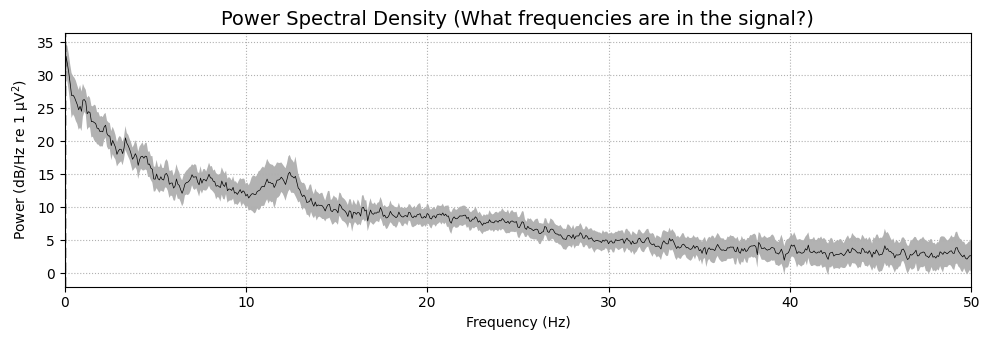

The peaks show dominant frequencies in the brain signals
For motor imagery, we care about 8-30 Hz (mu and beta bands)


In [34]:
#Visualize Power Spectral
#This show which frequencies are present in the signal

fig = raw.compute_psd(fmax=50).plot(picks='eeg', average=True)
plt.title('Power Spectral Density (What frequencies are in the signal?)', fontsize=14)
plt.tight_layout()
plt.show()
print("The peaks show dominant frequencies in the brain signals")
print("For motor imagery, we care about 8-30 Hz (mu and beta bands)")

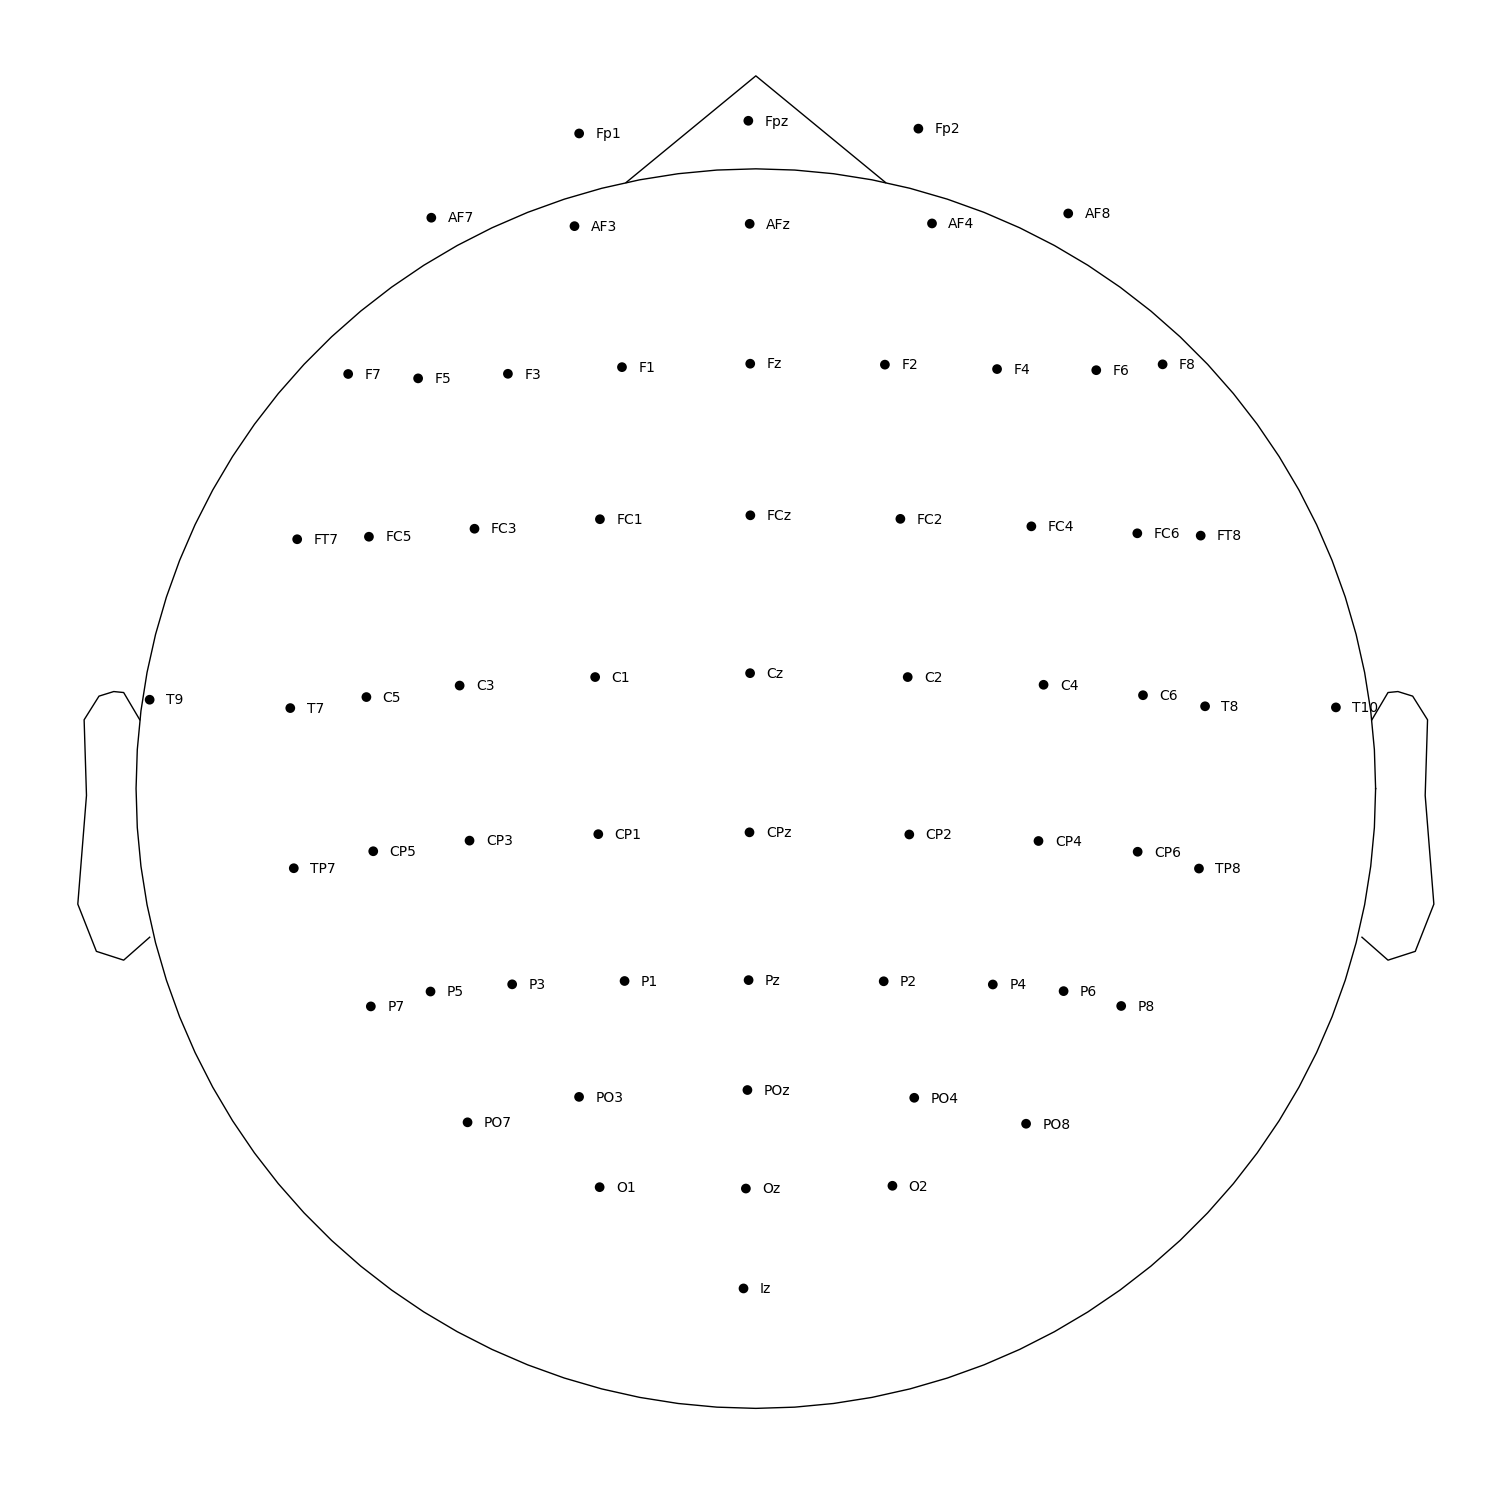

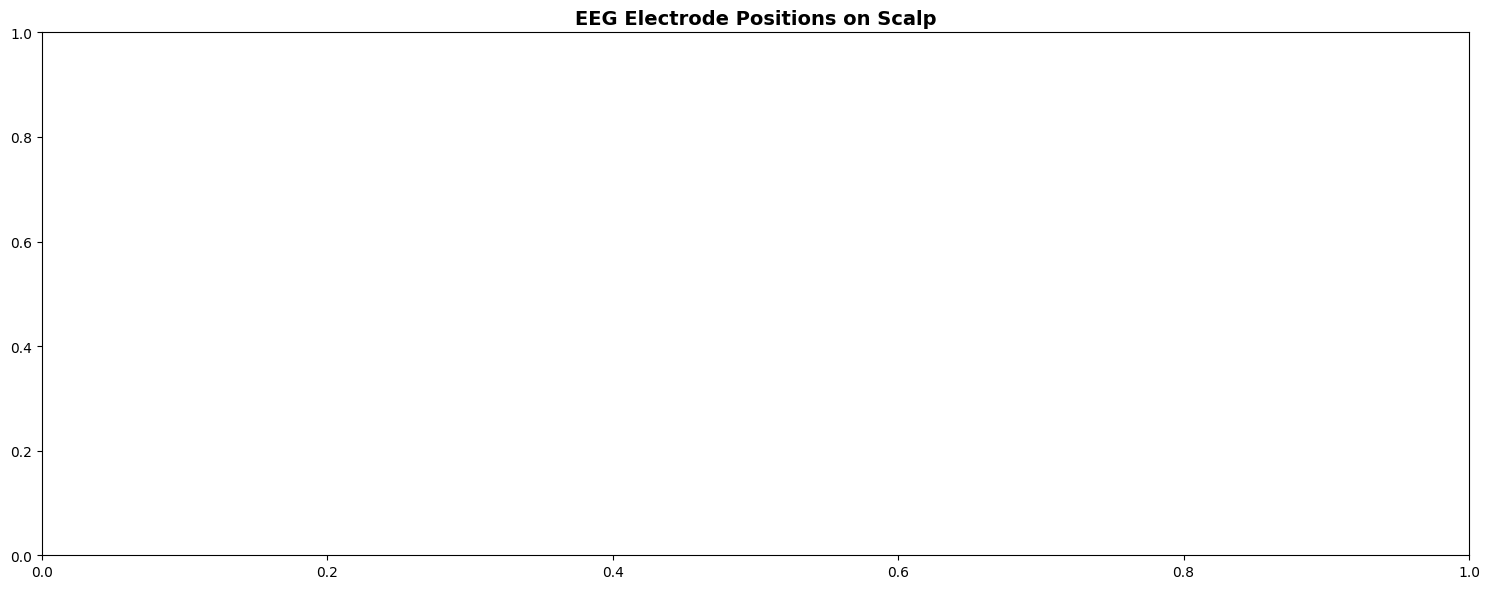

C3 = Left motor cortex, C4 = Right motor cortex, Cz = Center


In [35]:
# Visualize Electrode Locations
# Let's see where the electrodes are positioned on the head

fig = raw.plot_sensors(show_names=True)
plt.title('EEG Electrode Positions on Scalp', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("C3 = Left motor cortex, C4 = Right motor cortex, Cz = Center")

In [28]:
# Check Events (What tasks were performed?)
# Extract the event markers from the data

events, event_dict = mne.events_from_annotations(raw)

print(f"Found {len(events)} events")
print(f"Event types: {event_dict}")
print("\nEvent codes:")
print("T0 = Rest")
print("T1 = Left/Both fists imagery")
print("T2 = Right/Both feet imagery")

# Count events
for event_name, event_code in event_dict.items():
    count = np.sum(events[:, 2] == event_code)
    print(f"  {event_name}: {count} times")

Found 180 events
Event types: {np.str_('T0'): 1, np.str_('T1'): 2, np.str_('T2'): 3}

Event codes:
T0 = Rest
T1 = Left/Both fists imagery
T2 = Right/Both feet imagery
  T0: 90 times
  T1: 45 times
  T2: 45 times
